# Find the average rated wine

In [99]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import time
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import umap

df = pd.read_csv('/Users/colby/Desktop/Thinkful/winequality-red.csv')

In [100]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


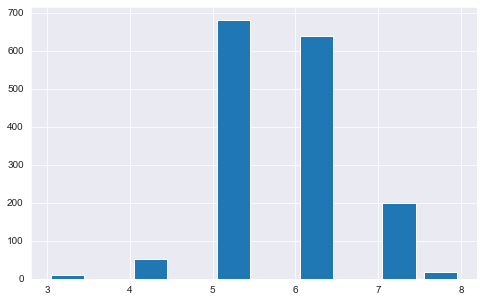

In [101]:
plt.figure(figsize=(8,5))
sns.set_style('darkgrid')

plt.hist(df.quality, rwidth=0.8)

plt.show()

In [102]:
# Convert categirical variables into present/absent or dummy variables
df=pd.get_dummies(df, columns=['quality'])

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 17 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality_3               1599 non-null uint8
quality_4               1599 non-null uint8
quality_5               1599 non-null uint8
quality_6               1599 non-null uint8
quality_7               1599 non-null uint8
quality_8               1599 non-null uint8
dtypes: float64(11), uint8(6)
memory usage: 146.9 KB


In [104]:
df.drop(['quality_3','quality_4', 'quality_6', 'quality_7', 'quality_8'],
        axis=1,inplace=True)

In [119]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_5
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality_5               1599 non-null uint8
dtypes: float64(11), uint8(1)
memory usage: 139.1 KB


## Standardize them using `StandardScaler`

In [106]:
y=df.loc[:,'quality_5']
X=df.loc[:, df.columns != 'quality_5']

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

## KMeans

47.4 ms ± 1.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


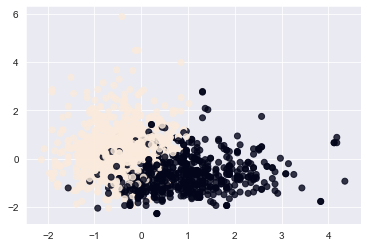

In [107]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred, alpha=.80)
plt.show()

In [125]:
# Get predicted clusters.
full_pred = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred) 

col_0,0,1
quality_5,,
0,404,514
1,184,497


In [133]:
import scipy

rand_index_score(y, full_pred)

0.5317724391261435

In [128]:
metrics.adjusted_rand_score(y, full_pred)

0.014040391575194907

In [136]:
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.21394174587820233


## MiniBatchKMeans for comparison

28.1 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


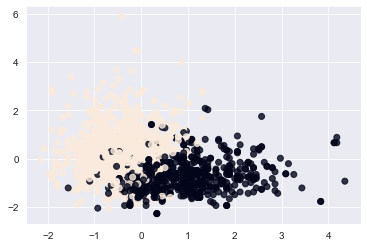

In [110]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(X_std)
y_pred_mini = mini_batch_k_means.predict(X_std)

# Plot the solution.
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred_mini, alpha=.80)
plt.show()

In [126]:
# Get predicted clusters.
full_pred2 = MiniBatchKMeans(n_clusters=2, random_state=123).fit_predict(X_std)

pd.crosstab(y, full_pred2)

col_0,0,1
quality_5,,
0,387,531
1,156,525


In [134]:
rand_index_score(y, full_pred2)

0.5500989745624808

In [127]:
metrics.adjusted_rand_score(y, full_pred2)

0.017037781884224203

In [137]:
labels2 = MiniBatchKMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels2, metric='euclidean'))

0.21856864328002443


## Dimentionality reduction with PCA

In [138]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

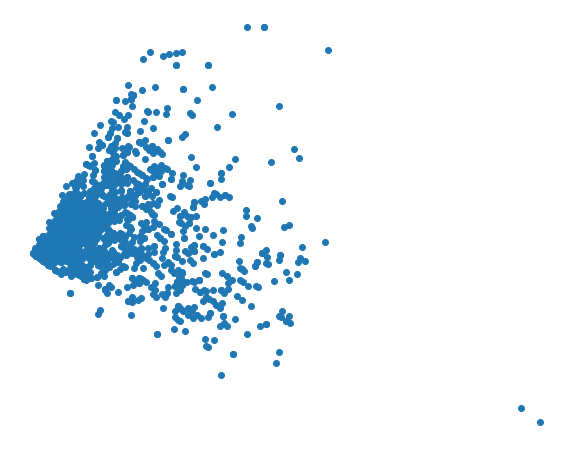

In [139]:
plt.figure(figsize=(10,8))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Dimensionality reduction with t-SNE

In [140]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1599 samples in 0.001s...
[t-SNE] Computed neighbors for 1599 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1599
[t-SNE] Computed conditional probabilities for sample 1599 / 1599
[t-SNE] Mean sigma: 2.386995
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.499870
[t-SNE] KL divergence after 300 iterations: 0.772522
t-SNE done! Time elapsed: 3.655308961868286 seconds


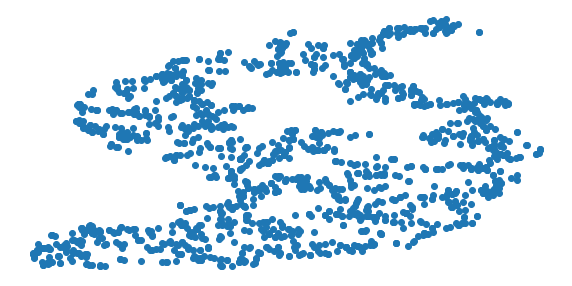

In [141]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Dimensionality reduction with UMAP

In [142]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


UMAP done! Time elapsed: 1.5760769844055176 seconds


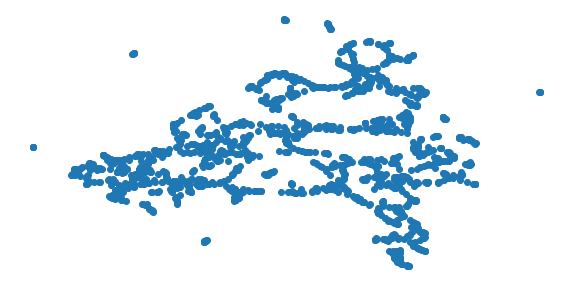

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Agglomerative clustering

In [129]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

In [130]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

Adjusted Rand Index of the DBSCAN solution: 0.011260660086560612
The silhouette score of the DBSCAN solution: -0.3177896958633127
